<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.494331,75.747000,3.842909,134.084240,130.691013,3.393228
1,0.0,1.0,56.245050,88.148227,-0.804432,153.588845,154.955786,-1.366941
2,0.0,2.0,72.763293,21.461462,-2.318276,101.906479,103.917269,-2.010789
3,0.0,3.0,92.093888,59.660818,-2.049019,159.705686,161.850465,-2.144778
4,0.0,4.0,65.727440,35.698865,-3.119863,108.306442,111.316151,-3.009709
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.318447,70.919866,-0.666065,175.572248,175.770492,-0.198244
249996,999.0,246.0,63.415051,94.787565,-1.351407,166.851209,167.874104,-1.022895
249997,999.0,247.0,65.391209,30.957084,0.958286,107.306579,106.343160,0.963419
249998,999.0,248.0,29.083976,37.255104,-3.719250,72.619830,76.603582,-3.983752


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.494331,75.747000,3.842909,134.084240,130.691013,3.393228
1,0.0,1.0,56.245050,88.148227,-0.804432,153.588845,154.955786,-1.366941
2,0.0,2.0,72.763293,21.461462,-2.318276,101.906479,103.917269,-2.010789
3,0.0,3.0,92.093888,59.660818,-2.049019,159.705686,161.850465,-2.144778
4,0.0,4.0,65.727440,35.698865,-3.119863,108.306442,111.316151,-3.009709
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.318447,70.919866,-0.666065,175.572248,175.770492,-0.198244
249996,999.0,246.0,63.415051,94.787565,-1.351407,166.851209,167.874104,-1.022895
249997,999.0,247.0,65.391209,30.957084,0.958286,107.306579,106.343160,0.963419
249998,999.0,248.0,29.083976,37.255104,-3.719250,72.619830,76.603582,-3.983752


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.494331  75.747000  3.842909  134.084240  130.691013  3.393228
      1.0    56.245050  88.148227 -0.804432  153.588845  154.955786 -1.366941
      2.0    72.763293  21.461462 -2.318276  101.906479  103.917269 -2.010789
      3.0    92.093888  59.660818 -2.049019  159.705686  161.850465 -2.144778
      4.0    65.727440  35.698865 -3.119863  108.306442  111.316151 -3.009709
...                ...        ...       ...         ...         ...       ...
999.0 245.0  95.318447  70.919866 -0.666065  175.572248  175.770492 -0.198244
      246.0  63.415051  94.787565 -1.351407  166.851209  167.874104 -1.022895
      247.0  65.391209  30.957084  0.958286  107.306579  106.343160  0.963419
      248.0  29.083976  37.255104 -3.719250   72.619830   76.603582 -3.983752
      249.0  45.713286  22.963035  0.012545   78.688866   78.878068 -0.189201

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.494331  75.747000  3.842909  134.084240  130.691013  3.393228
      1.0    56.245050  88.148227 -0.804432  153.588845  154.955786 -1.366941
      2.0    72.763293  21.461462 -2.318276  101.906479  103.917269 -2.010789
      3.0    92.093888  59.660818 -2.049019  159.705686  161.850465 -2.144778
      4.0    65.727440  35.698865 -3.119863  108.306442  111.316151 -3.009709
...                ...        ...       ...         ...         ...       ...
999.0 245.0  95.318447  70.919866 -0.666065  175.572248  175.770492 -0.198244
      246.0  63.415051  94.787565 -1.351407  166.851209  167.874104 -1.022895
      247.0  65.391209  30.957084  0.958286  107.306579  106.343160  0.963419
      248.0  29.083976  37.255104 -3.719250   72.619830   76.603582 -3.983752
      249.0  45.713286  22.963035  0.012545   78.688866   78.878068 -0.189201

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.494331,75.747000,3.842909,134.084240,130.691013,3.393228
1,0.0,1.0,56.245050,88.148227,-0.804432,153.588845,154.955786,-1.366941
2,0.0,2.0,72.763293,21.461462,-2.318276,101.906479,103.917269,-2.010789
3,0.0,3.0,92.093888,59.660818,-2.049019,159.705686,161.850465,-2.144778
4,0.0,4.0,65.727440,35.698865,-3.119863,108.306442,111.316151,-3.009709
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.318447,70.919866,-0.666065,175.572248,175.770492,-0.198244
249996,999.0,246.0,63.415051,94.787565,-1.351407,166.851209,167.874104,-1.022895
249997,999.0,247.0,65.391209,30.957084,0.958286,107.306579,106.343160,0.963419
249998,999.0,248.0,29.083976,37.255104,-3.719250,72.619830,76.603582,-3.983752


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.494331  75.747000  3.842909  134.084240  130.691013  3.393228
      1.0    56.245050  88.148227 -0.804432  153.588845  154.955786 -1.366941
      2.0    72.763293  21.461462 -2.318276  101.906479  103.917269 -2.010789
      3.0    92.093888  59.660818 -2.049019  159.705686  161.850465 -2.144778
      4.0    65.727440  35.698865 -3.119863  108.306442  111.316151 -3.009709
...                ...        ...       ...         ...         ...       ...
999.0 245.0  95.318447  70.919866 -0.666065  175.572248  175.770492 -0.198244
      246.0  63.415051  94.787565 -1.351407  166.851209  167.874104 -1.022895
      247.0  65.391209  30.957084  0.958286  107.306579  106.343160  0.963419
      248.0  29.083976  37.255104 -3.719250   72.619830   76.603582 -3.983752
      249.0  45.713286  22.963035  0.012545   78.688866   78.878068 -0.189201

[250000 rows x 6 columns]

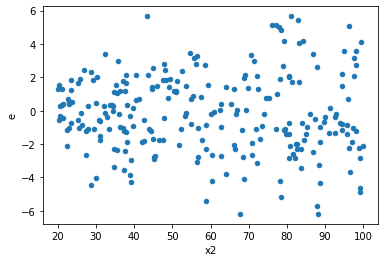

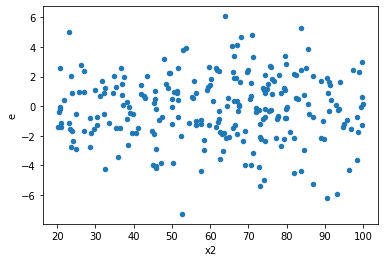

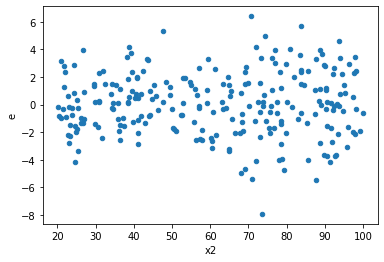

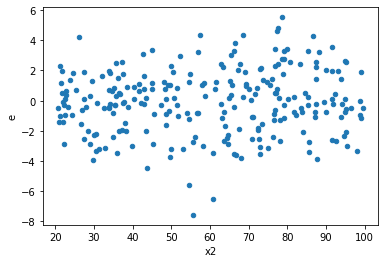

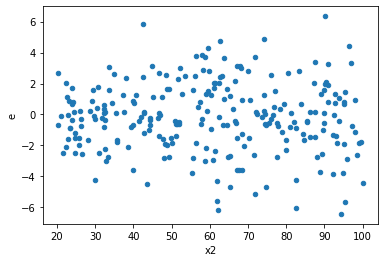

In [17]:
tablenew0 = table.loc[6.0]
tablenew1 = table.loc[8.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[21.0]
tablenew4 = table.loc[27.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,98.0,98.0,354.67034175078555,466.9837831568035,3.619085119905975,4.765140644457179,1.3166699556878558,0.17506484244043574,0.9124675787797821,0.08753242122021787,Reject001=1 : Homoscedasticity
2.0,98.0,98.0,406.25013640827876,451.4801585126196,4.145409555186518,4.606940392985914,1.1113354016425114,0.6023283208627528,0.6988358395686236,0.3011641604313764,Reject001=1 : Homoscedasticity
3.0,98.0,98.0,401.3876682483606,605.5808776017795,4.095792533146537,6.179396710222241,1.5087181931734719,0.04303400642141941,0.9784829967892903,0.021517003210709706,Reject001=1 : Homoscedasticity
4.0,98.0,98.0,451.1988156058487,573.5939664932438,4.604069546998456,5.852999658094324,1.2712665606691556,0.23658468831039747,0.8817076558448013,0.11829234415519874,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,385.75504050688335,477.4368591237839,3.936275923539626,4.871804684936571,1.2376684916324887,0.2929140582688572,0.8535429708655714,0.1464570291344286,Reject001=1 : Homoscedasticity
6.0,98.0,98.0,316.47029515628003,660.9685669657752,3.2292887260844902,6.7445772139364815,2.088564320513476,0.00032276318671131676,0.9998386184066443,0.00016138159335565838,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,482.97568487435444,597.4851178712906,4.928323315044433,6.096786917053986,1.23709150705325,0.2939688624905581,0.853015568754721,0.14698443124527905,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,360.46412737768424,619.2361939468494,3.678205381404941,6.318736672927035,1.717885767029547,0.00791989405179061,0.9960400529741047,0.003959947025895305,Reject001=0 : Heteroscedasticity
9.0,98.0,98.0,452.3550487299201,663.9866840344879,4.6158678441828584,6.775374326882529,1.467844088175355,0.058879131244669924,0.970560434377665,0.029439565622334962,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,527.6864515765119,511.37475170800064,5.384555628331754,5.218109711306129,0.9690882723636762,0.8768049013193511,Reject001=1 : Homoscedasticity
1.0,98.0,98.0,354.67034175078555,466.9837831568035,3.619085119905975,4.765140644457179,1.3166699556878558,0.17506484244043574,Reject001=1 : Homoscedasticity
2.0,98.0,98.0,406.25013640827876,451.4801585126196,4.145409555186518,4.606940392985914,1.1113354016425114,0.6023283208627528,Reject001=1 : Homoscedasticity
3.0,98.0,98.0,401.3876682483606,605.5808776017795,4.095792533146537,6.179396710222241,1.5087181931734719,0.04303400642141941,Reject001=1 : Homoscedasticity
4.0,98.0,98.0,451.1988156058487,573.5939664932438,4.604069546998456,5.852999658094324,1.2712665606691556,0.23658468831039747,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,385.75504050688335,477.4368591237839,3.936275923539626,4.871804684936571,1.2376684916324887,0.2929140582688572,Reject001=1 : Homoscedasticity
6.0,98.0,98.0,316.47029515628003,660.9685669657752,3.2292887260844902,6.7445772139364815,2.088564320513476,0.00032276318671131676,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,482.97568487435444,597.4851178712906,4.928323315044433,6.096786917053986,1.23709150705325,0.2939688624905581,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,360.46412737768424,619.2361939468494,3.678205381404941,6.318736672927035,1.717885767029547,0.00791989405179061,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      920
Reject001=0 : Heteroscedasticity     80
Name: Result_test, dtype: int64